In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("data-train.csv",index_col=0)
X_train.drop(['sales'],axis=1)
Y_train = X_train.sales

In [3]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [4]:
Model_1 = RandomForestRegressor()

# 2. Setup Pipeline

In [5]:

RG = Model_1

In [6]:

pipe = Pipeline(steps=[("RG",RG)])

In [7]:
param_grid = {
    "RG__ccp_alpha":[0.005,0.1,0.5,10],
    "RG__n_estimators":[10,100,1000]
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=10, estimator=Pipeline(steps=[('RG', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-58.999):
{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,73.564683,12.830345,0.436658,0.393950,0.005,1000,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.163148,-0.331036,-2.393719,-24.345716,-550.240444,-0.026586,-3.625375,-0.195787,-4.213022,-4.452217,-58.998705,163.891857,1
5,64.718781,30.713451,0.680501,0.473178,0.1,1000,"{'RG__ccp_alpha': 0.1, 'RG__n_estimators': 1000}",-0.324342,-0.555905,-4.018020,-29.424406,-550.723636,-0.115325,-3.390682,-0.451633,-7.029101,-3.570368,-59.960342,163.798755,2
4,10.292100,0.732535,0.141056,0.124143,0.1,100,"{'RG__ccp_alpha': 0.1, 'RG__n_estimators': 100}",-0.343808,-0.545405,-3.274685,-37.033023,-542.240614,-0.300945,-13.159918,-0.460090,-4.026434,-3.236846,-60.462177,160.950581,3
8,51.509039,33.773051,0.482189,0.471831,0.5,1000,"{'RG__ccp_alpha': 0.5, 'RG__n_estimators': 1000}",-0.388643,-0.856312,-1.890991,-27.773484,-562.681770,-0.281973,-3.801314,-0.516310,-5.253351,-3.405329,-60.684948,167.515361,4
1,6.366120,0.834118,0.054932,0.055551,0.005,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 100}",-0.196705,-0.349719,-7.063626,-23.389427,-579.607458,-0.477068,-5.445168,-0.951777,-11.712068,-1.981878,-63.117489,172.300794,5
7,2.757035,3.204606,0.013596,0.004648,0.5,100,"{'RG__ccp_alpha': 0.5, 'RG__n_estimators': 100}",-0.422145,-0.843626,-7.177574,-30.493103,-595.632391,-0.395242,-3.626507,-0.670982,-5.825014,-3.065234,-64.815182,177.146038,6
6,1.044146,0.137294,0.018815,0.043506,0.5,10,"{'RG__ccp_alpha': 0.5, 'RG__n_estimators': 10}",-0.709842,-1.662172,-2.410029,-25.257787,-562.283645,-0.551566,-57.878230,-0.659841,-3.599568,-34.340168,-68.935285,165.478707,7
0,0.553820,0.127648,0.030120,0.028485,0.005,10,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 10}",-0.266081,-0.452767,-4.028773,-122.053070,-522.705752,-0.018683,-19.312313,-0.155460,-0.326760,-22.875423,-69.219508,155.279664,8
11,44.889569,23.012119,0.530194,0.447028,10,1000,"{'RG__ccp_alpha': 10, 'RG__n_estimators': 1000}",-7.360508,-10.910549,-8.852647,-32.764771,-588.748462,-6.896019,-6.744569,-6.645303,-16.583710,-6.724235,-69.223077,173.346175,9
9,0.307461,0.478728,0.004953,0.003606,10,10,"{'RG__ccp_alpha': 10, 'RG__n_estimators': 10}",-11.740464,-15.949192,-19.369362,-51.053840,-558.060130,-6.338603,-9.249267,-8.411717,-22.561797,-7.188896,-70.992327,162.838289,10


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']
best_n_est = parms.iloc[0][0]['RG__n_estimators']

In [14]:
Model_2 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [17]:
MSE(RG1.predict(X_test1),Y_test1)

0.37491772122567135

In [18]:
result = pd.DataFrame(Y_test1)

In [19]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [20]:
MSE(result["sales"],result["Predicted_sales"])

0.37491772122567135

# 6. Inventory Decision

In [21]:
residual = result['sales']-result['Predicted_sales']

In [22]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [23]:
import scipy.stats as sct

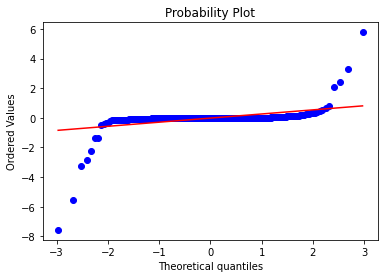

In [24]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [25]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

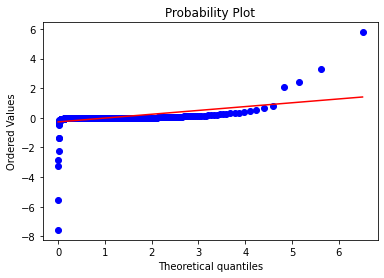

In [26]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [27]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

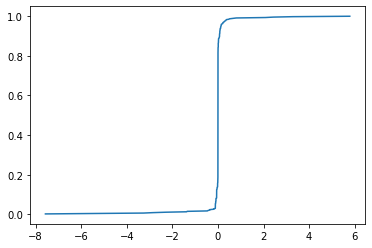

In [28]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

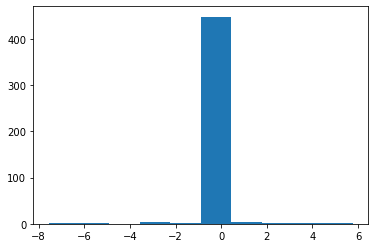

In [29]:
plt.hist(Sample)
plt.show()

In [30]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [31]:
offset = inv(Sample,jumps,2/3)
offset

0.0

In [32]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [33]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [34]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [35]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

81856.0

In [36]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

78096.0

In [37]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

81872.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [38]:
Model_4= RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [39]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    #pca to transform test data
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [40]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.976996,0.978611,0.976153,0.964893,0.919017,0.976439,0.976229,0.980139,0.975125,0.974645,0.969825
Exponential,0.937657,0.940516,0.936668,0.936652,0.890894,0.939664,0.937837,0.939202,0.935308,0.935843,0.933024
Empirical,0.994877,0.993018,0.990237,0.981116,0.933521,0.994776,0.990688,0.994623,0.990426,0.992797,0.985608


In [41]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,40432.0,44288.0,45192.0,44964.0,45620.0,38128.0,47804.0,45204.0,43592.0,40592.0,43581.6,2796.763959
Exponential,38804.0,42564.0,43364.0,43648.0,44224.0,36692.0,45924.0,43316.0,41812.0,38976.0,41932.4,2729.355352
Empirical,41172.0,44940.0,45844.0,45720.0,46340.0,38844.0,48512.0,45872.0,44276.0,41348.0,44286.8,2782.968228
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [42]:
profit_table.to_csv(".\\Model_Selection_Result\\4.2B_Random_forest(No_PCA).csv")

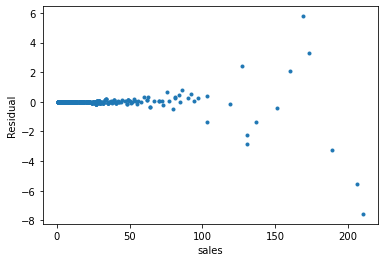

In [43]:
plt.xlabel("sales")
plt.ylabel("Residual")
plt.plot(result['sales'],residual,".")